In [5]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from collections import defaultdict
from analysis_utils import *

In [17]:
mu = 1
nets_paras = {
    8:{'net':8, 'l':[1e-2, 9e-3, 5e-3, 4e-3]},
}
with open('nc_SIR_8_range_mu10.json', 'r') as f:
    rltfile = json.load(f)
results = dict()
for net in [8]:
    results[net] = dict()
    with open(f'../../Networks/networks/realNet_{net}.json', 'r') as f:
        netfile = json.load(f)
    networkatt = NetAtrributions(netfile)
    for nu in [1,2,3,4]:
        results[net][nu] = dict()
        lThres = nets_paras[net]['l'][nu-1]
        for lid in [1.05, 1.1, 1.15, 1.2, 2]:
            l = lid*lThres
            results[net][nu][lid] = dict()
            for node in networkatt.nodes:
                results[net][nu][lid][node] = rltfile[f'n{net}_nu{nu}_l{l}_mu{mu}_ini{node}_range']


In [14]:
def normalize_list(data):  #normalize
    min_val = min(data) 
    max_val = max(data) 
    range_val = max_val - min_val 

    # (x - min) / (max - min)
    normalized_data = [(x - min_val) / range_val for x in data]
    return normalized_data

/tmp/ipykernel_27759/2441056823.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=colormap[i],edgecolor='none', linewidth=0))


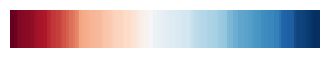

In [10]:
net = 8
nu = 1
lid = 1.15
with open(f'../../Networks/networks/realNet_{net}.json', 'r') as f:
    netfile = json.load(f)
networkatt = NetAtrributions(netfile)
# Calculate the ranking (coordinates) using the first ground truth, 
# map it to the color, and then calculate the new ranking (coordinates) using the second ground truth,
# then use the old coloring at the new coordinates, the difference in sorting between the two can be seen
sortpair1 = sorted(results[net][nu][lid].items(), key=lambda item: item[1], reverse=True)  # 降序
noderank1 = [_[0] for _ in sortpair1]
nodevalue1 = [_[1] for _ in sortpair1]
nodevalue1_norm = normalize_list(nodevalue1)
cmap = plt.cm.RdBu_r  
# Red corresponds to larger values, combined with the reverse sort, 
# the redder the value, the larger it is, and the closer it is to the left
# cmap = plt.cm.coolwarm
# cmap = plt.cm.jet
num_blocks = networkatt.N
colormap = cmap(nodevalue1_norm)
fig, ax = plt.subplots(figsize=(4, 0.5))
# Remove the black border of the canvas
# fig.patch.set_visible(False)  # Remove the black border of the canvas
ax.axis('off')  # cancel axis border

for i in range(num_blocks):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=colormap[i],edgecolor='none', linewidth=0))
ax.set_xlim(0, num_blocks)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

/tmp/ipykernel_27759/742147053.py:49: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=colormap[i],edgecolor='none', linewidth=0))


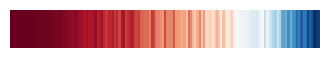

In [12]:
net = 8
nu = 1
lid = 2
with open(f'../../Networks/networks/realNet_{net}.json', 'r') as f:
    netfile = json.load(f)
networkatt = NetAtrributions(netfile)

sortpair6 = sorted(results[net][nu][lid].items(), key=lambda item: item[1], reverse=True)
mapp2to1 = dict(sortpair6)
temp = []
for node in noderank1:
    temp.append(mapp2to1[node])
temp = normalize_list(temp)
colormap = cmap(temp)
fig, ax = plt.subplots(figsize=(4, 0.5))

ax.axis('off')  
for i in range(num_blocks):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=colormap[i],edgecolor='none', linewidth=0))
ax.set_xlim(0, num_blocks)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [13]:
mu = 1
nets_paras = {
    8:{'net':8, 'lbd':[0.03,  0.05,  0.1,]},
    
}
maxEsize = {
    1:25, 2:81, 3:107, 4:230, 5:83, 6:99, 7:31, 8:37, 9:25, 10:16,
    11:13, 12:10, 13:7, 14:10, 15:10, 16:7, 17:124, 18:104, 19:58, 20:157
}
with open('tc_SIR_8_range_mu10.json', 'r') as f:
    rltfile_tc = json.load(f)
results_tc = dict()
for net in [8]:
    results_tc[net] = dict()
    with open(f'../../Networks/networks/realNet_{net}.json', 'r') as f:
        netfile = json.load(f)
    networkatt = NetAtrributions(netfile)
    for id,theta in enumerate([1/maxEsize[net], 1/4, 1/2]):
        lThres = nets_paras[net]['lbd'][id]
        results_tc[net][theta] = dict()
        if lThres*10 >= 1:
            l_up = lThres*2 
        else:
            l_up = lThres*10
        for lid, lbd in [(0.7,lThres*0.7), (0.8,lThres*0.8), (0.9,lThres*0.9),(1,lThres), (1.1,lThres*1.1),(1.2,lThres*1.2),]:
            results_tc[net][theta][lid] = dict()
            for node in networkatt.nodes:
                results_tc[net][theta][lid][node] = rltfile_tc[f'n{net}_theta{theta}_lbd{lbd}_mu{mu}_ini{node}_range']


/tmp/ipykernel_27759/1700401387.py:18: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=colormap[i],edgecolor='none', linewidth=0))


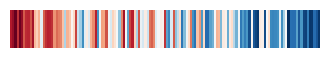

In [14]:
theta = [1/maxEsize[net], 1/4, 1/2][1]
lid = 1
sortpair3 = sorted(results_tc[net][theta][lid].items(), key=lambda item: item[1], reverse=True)
noderank3= [_[0] for _ in sortpair3]
nodevalue3 = [_[1] for _ in sortpair3]
nodevalue3_norm = normalize_list(nodevalue3)
mapp2to1 = dict(sortpair3)
temp = []
for node in noderank1:
    temp.append(mapp2to1[node])
temp = normalize_list(temp)
colormap = cmap(temp)
fig, ax = plt.subplots(figsize=(4, 0.5))

ax.axis('off')  
for i in range(num_blocks):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=colormap[i],edgecolor='none', linewidth=0))
ax.set_xlim(0, num_blocks)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

/tmp/ipykernel_27759/4202729400.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=colormap[i],edgecolor='none', linewidth=0))


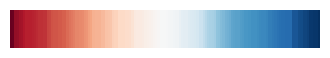

In [15]:
theta = [1/maxEsize[net], 1/4, 1/2][1]
lid = 1
sortpair7 = sorted(results_tc[net][theta][lid].items(), key=lambda item: item[1], reverse=True)
noderank7= [_[0] for _ in sortpair7]
nodevalue7 = [_[1] for _ in sortpair7]
nodevalue7_norm = normalize_list(nodevalue7)
colormap = cmap(nodevalue7_norm)
fig, ax = plt.subplots(figsize=(4, 0.5))

ax.axis('off')  
for i in range(num_blocks):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=colormap[i],edgecolor='none', linewidth=0))
ax.set_xlim(0, num_blocks)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

/tmp/ipykernel_27759/3050809933.py:19: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=colormap[i],edgecolor='none', linewidth=0))


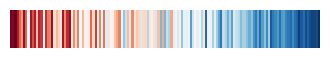

In [16]:
theta = [1/maxEsize[net], 1/4, 1/2][2]
lid = 1
sortpair5 = sorted(results_tc[net][theta][lid].items(), key=lambda item: item[1], reverse=True)
noderank5= [_[0] for _ in sortpair5]
nodevalue5 = [_[1] for _ in sortpair5]
nodevalue5_norm = normalize_list(nodevalue5)
# cmap = plt.cm.RdBu
mapp2to1 = dict(sortpair5)
temp = []
for node in noderank3:
    temp.append(mapp2to1[node])
temp = normalize_list(temp)
colormap = cmap(temp)
fig, ax = plt.subplots(figsize=(4, 0.5))

ax.axis('off')  
for i in range(num_blocks):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=colormap[i],edgecolor='none', linewidth=0))
ax.set_xlim(0, num_blocks)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

/tmp/ipykernel_27759/319086030.py:19: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=colormap[i],edgecolor='none', linewidth=0))


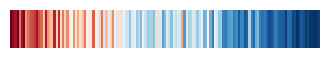

In [17]:
theta = [1/maxEsize[net], 1/4, 1/2][0]
lid = 0.9
sortpair4 = sorted(results_tc[net][theta][lid].items(), key=lambda item: item[1], reverse=True)
noderank4= [_[0] for _ in sortpair4]
nodevalue4 = [_[1] for _ in sortpair4]
nodevalue4_norm = normalize_list(nodevalue4)
# cmap = plt.cm.RdBu
mapp2to1 = dict(sortpair4)
temp = []
for node in noderank3:
    temp.append(mapp2to1[node])
temp = normalize_list(temp)
colormap = cmap(temp)
fig, ax = plt.subplots(figsize=(4, 0.5))

ax.axis('off') 
for i in range(num_blocks):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=colormap[i],edgecolor='none', linewidth=0))
ax.set_xlim(0, num_blocks)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

/tmp/ipykernel_27759/3300832225.py:7: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=colormap[i],edgecolor='none', linewidth=0))


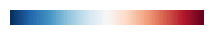

In [25]:
colormap = cmap(np.linspace(0,1,143))
fig, ax = plt.subplots(figsize=(2.5, 0.2))

ax.axis('off')  
for i in range(num_blocks):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=colormap[i],edgecolor='none', linewidth=0))
ax.set_xlim(0, num_blocks)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.show()